# DL CASE-STUDIES | NATURAL LANGUAGE PROCESSING (NLP)

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# sns.set()

==========

## Spam Detection | Text Classification (NLP Case-study)

Dataset Source: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

## Importing & Inspecting Data

In [2]:
sms = pd.read_csv('spam.csv', encoding='ISO-8859-1')
sms

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## Pre-processing Data

##### Basic Data Pre-processing

In [4]:
sms = sms.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
sms.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
sms.columns = ['labels', 'data'] # or sms.rename(columns={'v1':"labels"})

In [6]:
sms.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
X = sms['data']
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: data, Length: 5572, dtype: object

In [8]:
y = sms['labels'].map({'ham': 0, 'spam': 1}).values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [9]:
sms.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

##### Text Pre-processing

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [17]:
tokenizer = Tokenizer(num_words=20000)

In [18]:
tokenizer.fit_on_texts(X_train)

In [19]:
seq_train = tokenizer.texts_to_sequences(X_train)

In [20]:
seq_test = tokenizer.texts_to_sequences(X_test)

In [21]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [22]:
data_train = pad_sequences(seq_train)
data_train

array([[   0,    0,    0, ...,   16,   10,  808],
       [   0,    0,    0, ...,   31, 3397,    8],
       [   0,    0,    0, ...,  889,  366, 1491],
       ...,
       [   0,    0,    0, ...,    1,   31,  175],
       [   0,    0,    0, ...,    5, 1942,   42],
       [   0,    0,    0, ...,  425,  797, 3238]])

In [23]:
data_train.shape

(3733, 189)

In [24]:
data_test = pad_sequences(seq_test, maxlen=data_train.shape[1])
data_test

array([[   0,    0,    0, ..., 1820,   27,  592],
       [   0,    0,    0, ...,   54,   59,  115],
       [   0,    0,    0, ...,   14,    3,  722],
       ...,
       [   0,    0,    0, ...,    4,  782,   64],
       [   0,    0,    0, ...,    6,   15,  222],
       [   0,    0,    0, ...,  142,  414,  109]])

In [25]:
data_test.shape

(1839, 189)

## Exploring Data

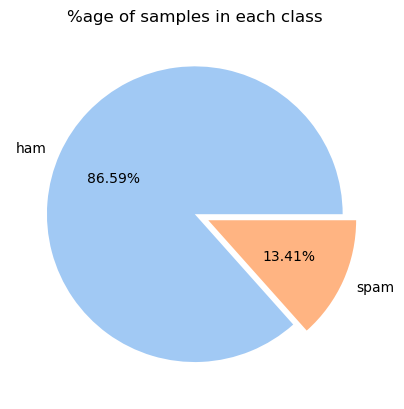

In [26]:
plt.title('%age of samples in each class')
plt.pie(sms['labels'].value_counts(),labels=['ham','spam'],colors=sns.color_palette('pastel'),explode=[0,0.1],autopct='%.2f%%')
plt.show()

<AxesSubplot:xlabel='labels', ylabel='count'>

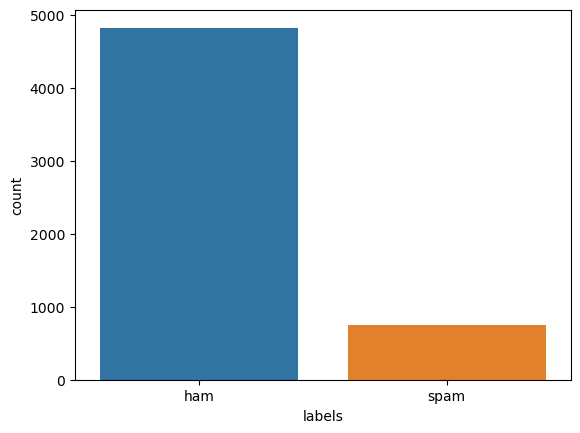

In [27]:
sns.countplot(x=sms['labels'])

## Model Training & Building 

In [28]:
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model

In [29]:
# Input layer
i = Input(shape=(data_train.shape[1],))  # input layer takes in sequences of integers

# Embedding layer
x = Embedding(len(tokenizer.word_index) + 1, 20)(i) # This takes in sequences of integers and returns sequences of word vectors

# LSTM layer
x = LSTM(15, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)

# Dense layer
x = Dense(1, activation='sigmoid')(x)
# it is an binary classification problem, so we are using activation function ='sigmoid'

model = Model(i, x)

In [ ]:
'''
model=Sequential()

# embedding layer
model.add(Embedding(max_words,50,input_length=max_len,trainable=True))

# lstm layer
model.add(LSTM(100,return_sequences=True,dropout=0.5))
model.add(Flatten()) 

# Dense layer
model.add(Dense(200,activation='relu',name='hl1')) # hidden layer 1
model.add(Dense(100,activation='relu',name='hl2')) # hidden layer 2
model.add(Dense(1,activation='sigmoid',name='ol')) # output layer
'''

In [30]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
hist = model.fit(x=data_train, y=y_train, epochs=20, validation_data=(data_test, y_test))

Epoch 1/20
117/117 [==============================] - 10s 63ms/step - loss: 0.4938 - accuracy: 0.8312 - val_loss: 0.2858 - val_accuracy: 0.8760
Epoch 2/20
117/117 [==============================] - 7s 58ms/step - loss: 0.1957 - accuracy: 0.9411 - val_loss: 0.1158 - val_accuracy: 0.9777
Epoch 3/20
117/117 [==============================] - 7s 58ms/step - loss: 0.0820 - accuracy: 0.9871 - val_loss: 0.0701 - val_accuracy: 0.9821
Epoch 4/20
117/117 [==============================] - 7s 58ms/step - loss: 0.0466 - accuracy: 0.9922 - val_loss: 0.0560 - val_accuracy: 0.9864
Epoch 5/20
117/117 [==============================] - 7s 58ms/step - loss: 0.0278 - accuracy: 0.9952 - val_loss: 0.0497 - val_accuracy: 0.9875
Epoch 6/20
117/117 [==============================] - 7s 58ms/step - loss: 0.0166 - accuracy: 0.9976 - val_loss: 0.0516 - val_accuracy: 0.9864
Epoch 7/20
117/117 [==============================] - 7s 58ms/step - loss: 0.0119 - accuracy: 0.9989 - val_loss: 0.0508 - val_accuracy: 0.986

## Model Evaluation

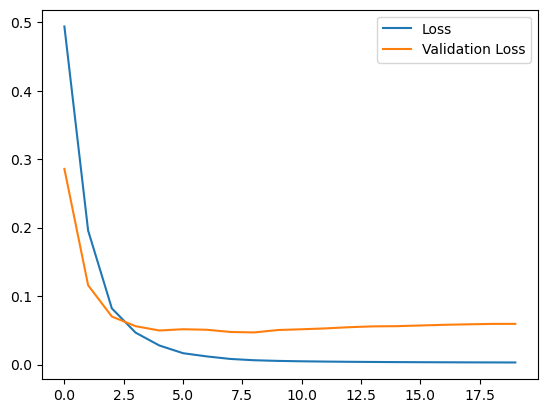

In [32]:
plt.plot(hist.history['loss'], label='Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

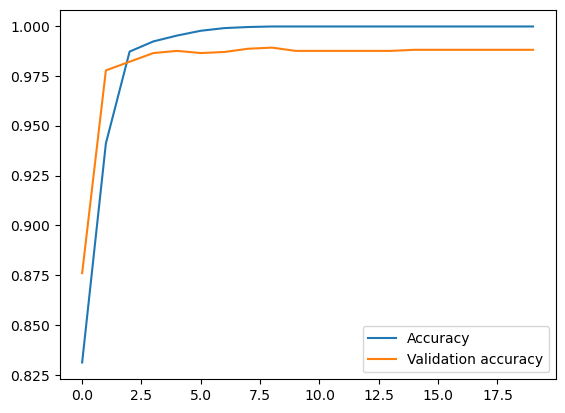

In [33]:
plt.plot(hist.history['accuracy'], label='Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

==========

# THANK YOU!